## 4.2.2. 데이터 분석 및 전처리

### 데이터 분석하기

In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
DATA_IN_PATH = './data_in/'

In [10]:
print('파일 크기: ')
for file in os.listdir(DATA_IN_PATH):
    if 'txt' in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 100000, 2)) + 'MB')

파일 크기: 
ratings_test.txt              48.93MB
ratings.txt                   195.15MB
ratings_train.txt             146.29MB


In [11]:
train_data = pd.read_csv(DATA_IN_PATH + 'ratings_train.txt', header = 0, delimiter = '\t', quoting =3)
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [12]:
print(f'전체 학습 데이터의 개수: {len(train_data)}')

전체 학습 데이터의 개수: 150000


In [29]:
train_lenght = train_data.document.astype(str).apply(len)

In [30]:
train_lenght.head(10)

0    19
1    33
2    17
3    29
4    61
5    45
6    21
7    86
8    22
9    45
Name: document, dtype: int64

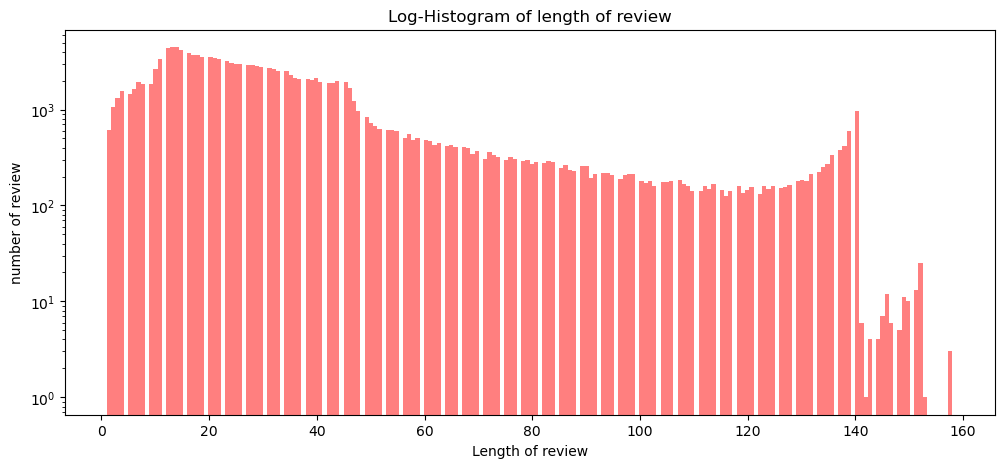

In [31]:
plt.figure(figsize=(12, 5))

plt.hist(train_lenght, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log')
plt.title('Log-Histogram of length of review')
plt.xlabel('Length of review')
plt.ylabel('number of review')
plt.show()

In [32]:
print('리뷰 길이 최대 값: {}'.format(np.max(train_lenght)))
print('리뷰 길이 최소 값: {}'.format(np.min(train_lenght)))
print('리뷰 길이 평균 값: {:.2f}'.format(np.mean(train_lenght)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_lenght)))
print('리뷰 길이 중간 값: {}'.format(np.median(train_lenght)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 길이 제 1 사분위: {}'.format(np.percentile(train_lenght, 25)))
print('리뷰 길이 제 3 사분위: {}'.format(np.percentile(train_lenght, 75)))

리뷰 길이 최대 값: 158
리뷰 길이 최소 값: 1
리뷰 길이 평균 값: 35.24
리뷰 길이 표준편차: 29.58
리뷰 길이 중간 값: 27.0
리뷰 길이 제 1 사분위: 16.0
리뷰 길이 제 3 사분위: 42.0


{'whiskers': [<matplotlib.lines.Line2D at 0x30cea9310>,
 'caps': [<matplotlib.lines.Line2D at 0x30cea8e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x30cf0a910>],
 'medians': [<matplotlib.lines.Line2D at 0x30cebec10>],
 'fliers': [<matplotlib.lines.Line2D at 0x30cee17d0>],
 'means': [<matplotlib.lines.Line2D at 0x30cee2790>]}

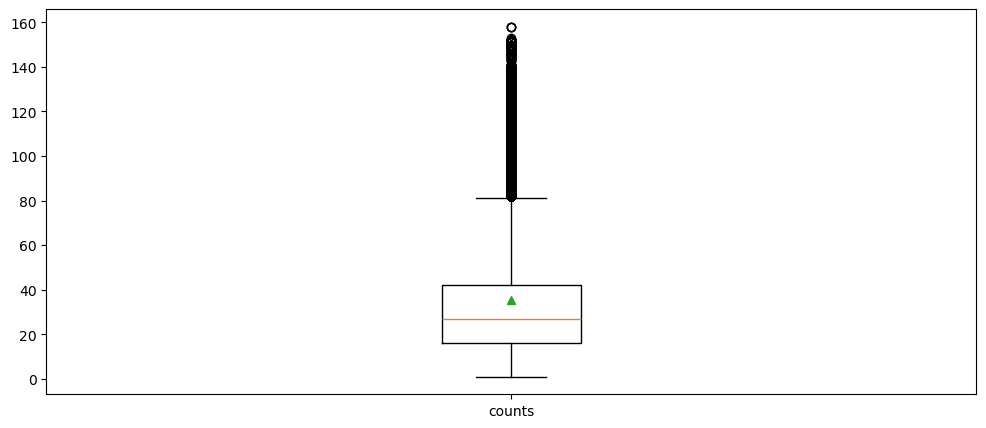

In [33]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot(train_lenght,
             labels=['counts'],
             showmeans=True)

In [36]:
train_review = [review for review in train_data.document if type(review) is str]
train_review[:10]

['아 더빙.. 진짜 짜증나네요 목소리',
 '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
 '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.',
 '원작의 긴장감을 제대로 살려내지못했다.',
 '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네',
 '액션이 없는데도 재미 있는 몇안되는 영화',
 '왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?']

In [63]:
wordcloud = WordCloud(font_path = DATA_IN_PATH + 'NanumGothic.ttf').generate(' '.join(train_review))

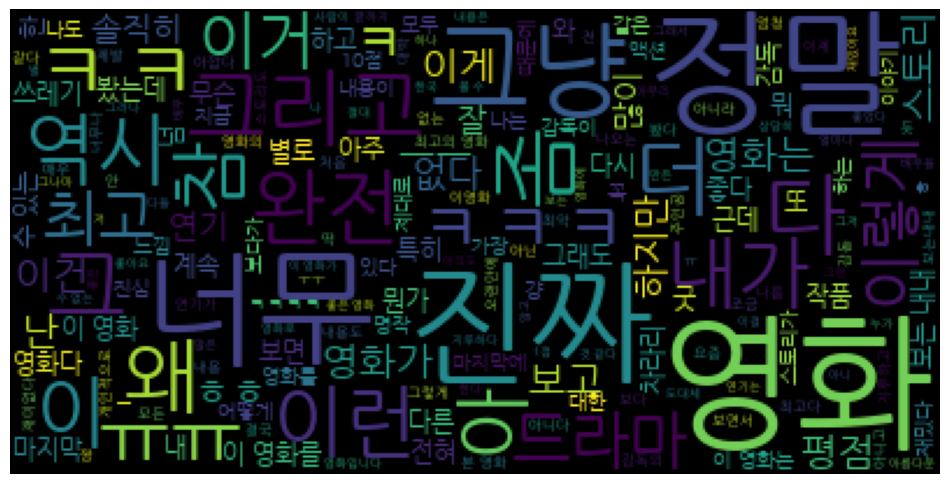

In [65]:
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<Axes: xlabel='label', ylabel='count'>

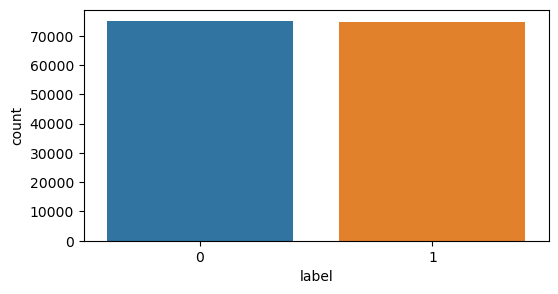

In [50]:
fig, ax = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(x= 'label', data = train_data, ax=ax)

In [51]:
print("긍정 리뷰 개수: {}".format(train_data['label'].value_counts()[1]))
print("부정 리뷰 개수: {}".format(train_data['label'].value_counts()[0]))

긍정 리뷰 개수: 74827
부정 리뷰 개수: 75173


In [55]:
train_word_counts = train_data.document.astype(str).apply(lambda x:len(x.split(' ')))
train_word_counts.head(10)

0     5
1     4
2     1
3     6
4    11
5     8
6     4
7    13
8     6
9    10
Name: document, dtype: int64

Text(0, 0.5, 'Number of reviews')

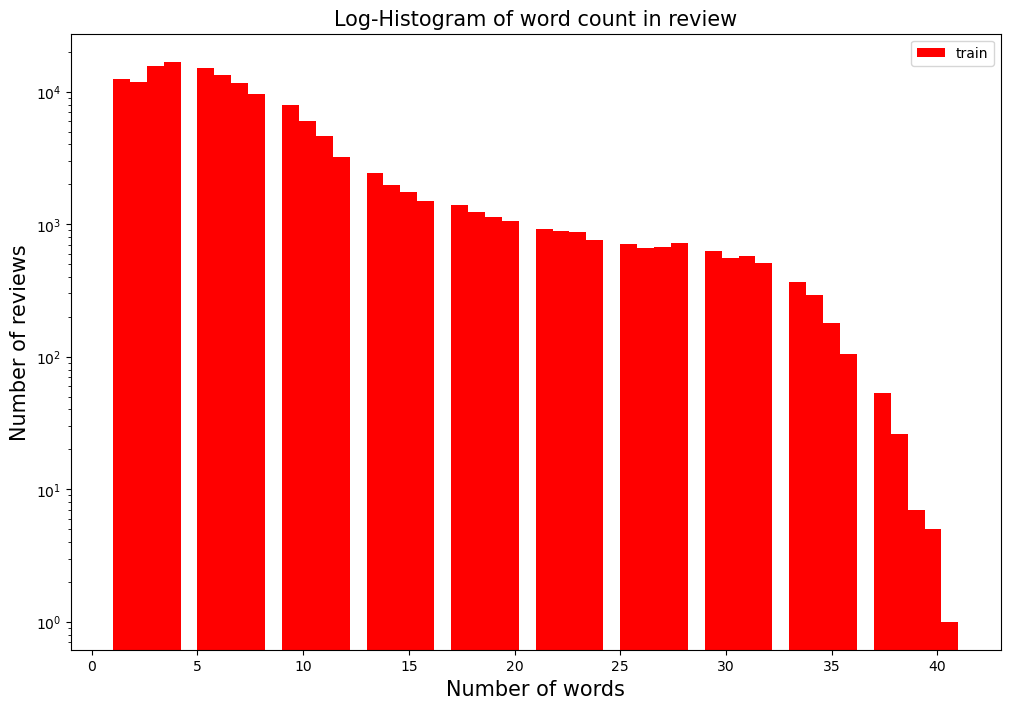

In [56]:
plt.figure(figsize=(12, 8))
plt.hist(train_word_counts, bins=50, facecolor='r',label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

In [57]:
print('리뷰 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('리뷰 단어 개수 최소 값: {}'.format(np.min(train_word_counts)))
print('리뷰 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('리뷰 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('리뷰 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))

리뷰 단어 개수 최대 값: 41
리뷰 단어 개수 최소 값: 1
리뷰 단어 개수 평균 값: 7.58
리뷰 단어 개수 표준편차: 6.51
리뷰 단어 개수 중간 값: 6.0
리뷰 단어 개수 제 1 사분위: 3.0
리뷰 단어 개수 제 3 사분위: 9.0


In [58]:
qmarks = np.mean(train_data['document'].astype(str).apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
fullstop = np.mean(train_data['document'].astype(str).apply(lambda x: '.' in x)) # 마침표
                  
print('물음표가있는 질문: {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 질문: {:.2f}%'.format(fullstop * 100))

물음표가있는 질문: 8.25%
마침표가 있는 질문: 51.76%


### 데이터 전처리

In [72]:
import numpy as np 
import pandas as pd
import re
import json
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [75]:
DATA_IN_PATH = './data_in/'

train_data = pd.read_csv(DATA_IN_PATH + 'ratings_train.txt', header =0, delimiter='\t', quoting=3)

print(train_data.head(5))

         id                                           document  label
0   9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1   3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2  10265843                                  너무재밓었다그래서보는것을추천한다      0
3   9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1


In [77]:
# 한글만 남기고 특수문자 제거
review_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]","", train_data['document'][0])
print(review_text)

아 더빙 진짜 짜증나네요 목소리


In [78]:
# 라이브러리를 통한 특수문자 제거 및 단어 리스트 생성
okt = Okt()
review_text = okt.morphs(review_text, stem=True)
print(review_text)

['아', '더빙', '진짜', '짜증나다', '목소리']


In [80]:
# 불용어 제거 (별로 중요하지 않은 단어)
stop_words = set(['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한'])
clean_review = [token for token in review_text if not token in stop_words]
print(clean_review)

['더빙', '진짜', '짜증나다', '목소리']


In [81]:
def preprocessing(review, okt, remove_stopwords = False, stop_words = []):
    # 함수의 인자는 다음과 같다.
    # review : 전처리할 텍스트
    # okt : okt 객체를 반복적으로 생성하지 않고 미리 생성후 인자로 받는다.
    # remove_stopword : 불용어를 제거할지 선택 기본값은 False
    # stop_word : 불용어 사전은 사용자가 직접 입력해야함 기본값은 비어있는 리스트
    
    # 1. 한글 및 공백을 제외한 문자 모두 제거.
    review_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", "", review)
    
    # 2. okt 객체를 활용해서 형태소 단위로 나눈다.
    word_review = okt.morphs(review_text, stem=True)
    
    if remove_stopwords:
        
        # 불용어 제거(선택적)
        word_review = [token for token in word_review if not token in stop_words]
        
   
    return word_review

In [82]:
stop_words = [ '은', '는', '이', '가', '하', '아', '것', '들','의', '있', '되', '수', '보', '주', '등', '한']
okt = Okt()
clean_train_review = []

for review in train_data['document']:
    # 비어있는 데이터에서 멈추지 않도록 string인 경우만 진행
    if type(review) == str:
        clean_train_review.append(preprocessing(review, okt, remove_stopwords = True, stop_words=stop_words))
    else:
        clean_train_review.append([])  #string이 아니면 비어있는 값 추가

In [88]:
clean_train_review[:3]

[['더빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'],
 ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다']]

In [84]:
# 테스트 데이터에 대하여 단어 분리 및 불용어 제거
test_data = pd.read_csv(DATA_IN_PATH + 'ratings_test.txt', header=0, delimiter='\t', quoting=3 )

clean_test_review = []

for review in test_data['document']:
    # 비어있는 데이터에서 멈추지 않도록 string인 경우만 진행
    if type(review) == str:
        clean_test_review.append(preprocessing(review, okt, remove_stopwords = True, stop_words=stop_words))
    else:
        clean_test_review.append([])  #string이 아니면 비어있는 값 추가

In [93]:
# 분리된 단어데 대하여 토큰화 진행
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_review)
train_sequences = tokenizer.texts_to_sequences(clean_train_review)
test_sequences = tokenizer.texts_to_sequences(clean_test_review)

# 토큰화된 단어에 대하여 사전(딕셔너리) 형태로 저장
word_vocab = tokenizer.word_index

In [104]:
pad_sequences(train_sequences)

array([[    0,     0,     0, ...,    20,   265,   664],
       [    0,     0,     0, ...,   969,   680,    24],
       [    0,     0,     0, ...,     2,   226,    13],
       ...,
       [    0,     0,     0, ..., 10480, 10415,  1050],
       [    0,     0,     0, ...,  1231,   545,  7862],
       [    0,     0,     0, ...,    63,  1290,     1]], dtype=int32)

In [105]:
MAX_SEQUENCE_LENGTH = 8 # 문장 최대 길이

train_inputs = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post') # 학습 데이터를 백터화
train_labels = np.array(train_data['label']) # 학습 데이터의 라벨

test_inputs = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post') # 학습 데이터를 백터화
test_labels = np.array(test_data['label']) # 테스트 데이터의 라벨

In [109]:
train_inputs[0]

array([463,  20, 265, 664,   0,   0,   0,   0], dtype=int32)

In [110]:
DATA_IN_PATH = './data_in/'
TRAIN_INPUT_DATA = 'nsmc_train_input.npy'
TRAIN_LABEL_DATA = 'nsmc_train_label.npy'
TEST_INPUT_DATA = 'nsmc_test_input.npy'
TEST_LABEL_DATA = 'nsmc_test_label.npy'
DATA_CONFIGS = 'data_configs.json'

data_configs = {}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab) # vocab size 추가

import os
# 저장하는 디렉토리가 존재하지 않으면 생성
if not os.path.exists(DATA_IN_PATH):
    os.makedirs(DATA_IN_PATH)

# 전처리 된 학습 데이터를 넘파이 형태로 저장
np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), train_labels)
# 전처리 된 테스트 데이터를 넘파이 형태로 저장
np.save(open(DATA_IN_PATH + TEST_INPUT_DATA, 'wb'), test_inputs)
np.save(open(DATA_IN_PATH + TEST_LABEL_DATA, 'wb'), test_labels)

# 데이터 사전을 json 형태로 저장
json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'), ensure_ascii=False)